In [10]:
import functions
from functions import *
import pandas as pd

file_path = 'parameters.csv'



def check_columns_defined(df):
    required_columns = ['D', 'N','epsilon_2', 'mu']

    for col in required_columns:
        assert col in df.columns, f"Column '{col}' is not defined in the CSV file."


# Read the CSV file into a DataFrame
try:
    input_param = pd.read_csv(file_path, header=0)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: Unable to parse file '{file_path}'. Check if it's a valid CSV file.")
    exit(1)



#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
#epsilon = L_over_r/N
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
#epsilon_2 = epsilon**2
#broadcast values to functions
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2

#calculate lowest eigenvalue and eigenvector
lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-4, conjugate_gradient_tolerance = 1.e-4, max_iters_power_method = 20000, max_iters_conjugate_gradient= 10000)


In [11]:

# #write eigenvector to csv
df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

# Initialize arbitrary plane wave function
psi = lowest_EigVector

# Printing the expectation energy for the given wave function psi
print("Expectation Energy:", expectation_energy(psi))

# Printing the expectation momentum for the given wave function psi
print("Expectation Momentum:", expectation_momentum(psi))

# Printing the expectation position for the given wave function psi
print("Expectation Position:", expectation_position(psi))

# Printing the indetermination of momentum for the given wave function psi
print("Indetermination Momentum:", indetermination_momentum(psi))

# Printing the indetermination of position for the given wave function psi
print("Indetermination Position:", indetermination_position(psi))

# Printing the probability for x greater than 0 for the given wave function psi
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.4861142607530222
Expectation Momentum: [[-1.8846355e-05]]
Expectation Position: [[97.78830923]]
Indetermination Momentum: [[0.02362476]]
Indetermination Position: [[942.29282186]]
Probability for x > 0: 0.4635457144885169


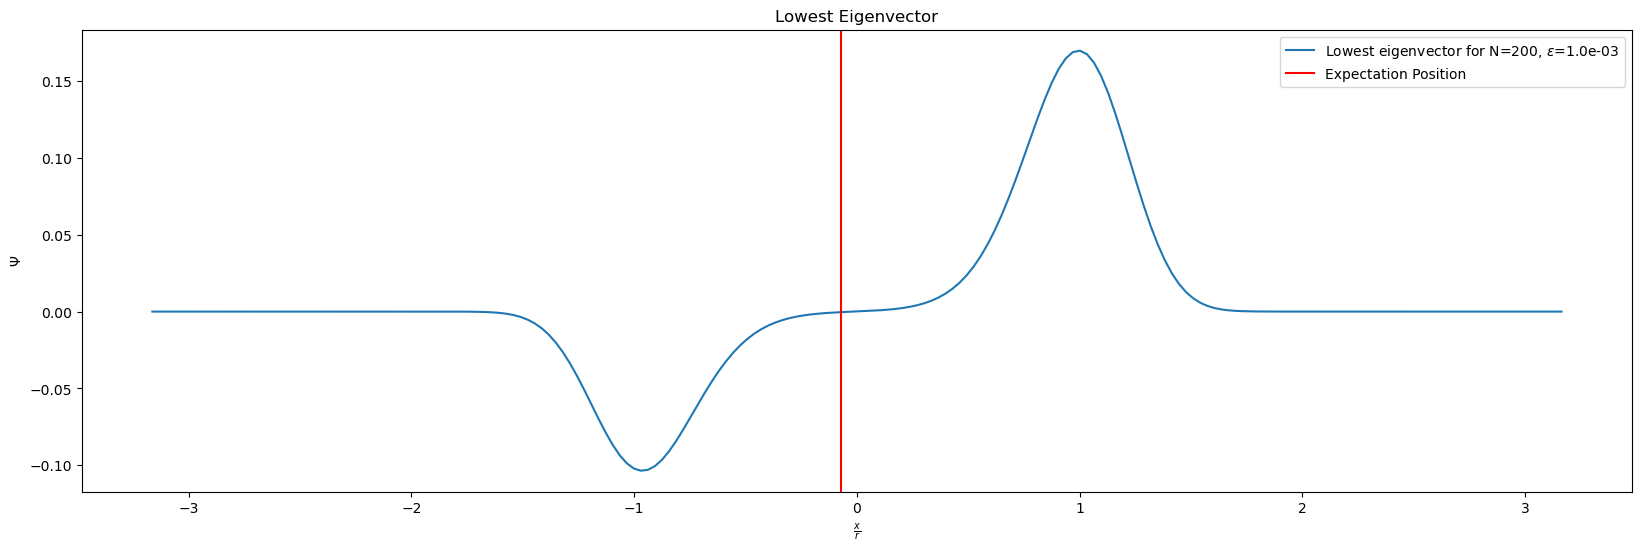

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.title('Lowest Eigenvector')
plt.xlabel(r"$\frac{x}{r}$")
plt.ylabel(r"$\Psi$")
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon
x_expected = (expectation_position(psi)-N/2)*epsilon
x_indetermination = (indetermination_position(psi)-N/2)*epsilon
plt.plot(x_axis,lowest_EigVector, label = fr'Lowest eigenvector for N={N}, $\epsilon$={epsilon_2:.1e}')
plt.axvline(x=x_expected, color='red', linestyle='-', label='Expectation Position')
plt.legend(loc='upper right')
plt.show()


In [25]:
import functions
from functions import *
import pandas as pd

file_path = 'parameters2.csv'



def check_columns_defined(df):
    required_columns = ['D', 'N','epsilon_2', 'mu']

    for col in required_columns:
        assert col in df.columns, f"Column '{col}' is not defined in the CSV file."


# Read the CSV file into a DataFrame
try:
    input_param = pd.read_csv(file_path, header=0)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: Unable to parse file '{file_path}'. Check if it's a valid CSV file.")
    exit(1)



#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
#epsilon = L_over_r/N
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
#epsilon_2 = epsilon**2
#broadcast values to functions
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2

#calculate lowest eigenvalue and eigenvector
lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-4, conjugate_gradient_tolerance = 1.e-4, max_iters_power_method = 20000, max_iters_conjugate_gradient= 10000)


In [26]:
# #write eigenvector to csv
df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

# Initialize arbitrary plane wave function
psi = lowest_EigVector

# Printing the expectation energy for the given wave function psi
print("Expectation Energy:", expectation_energy(psi))

# Printing the expectation momentum for the given wave function psi
print("Expectation Momentum:", expectation_momentum(psi))

# Printing the expectation position for the given wave function psi
print("Expectation Position:", expectation_position(psi))

# Printing the indetermination of momentum for the given wave function psi
print("Indetermination Momentum:", indetermination_momentum(psi))

# Printing the indetermination of position for the given wave function psi
print("Indetermination Position:", indetermination_position(psi))

# Printing the probability for x greater than 0 for the given wave function psi
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.47869354558609667
Expectation Momentum: [[4.05326512e-06]
 [1.75384753e-05]]
Expectation Position: [[100.032239  ]
 [100.00405169]]
Indetermination Momentum: [[0.01138352]
 [0.01138351]]
Indetermination Position: [[472.51907093]
 [472.51991357]]
Probability for x > 0: 0.5061089619625797


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


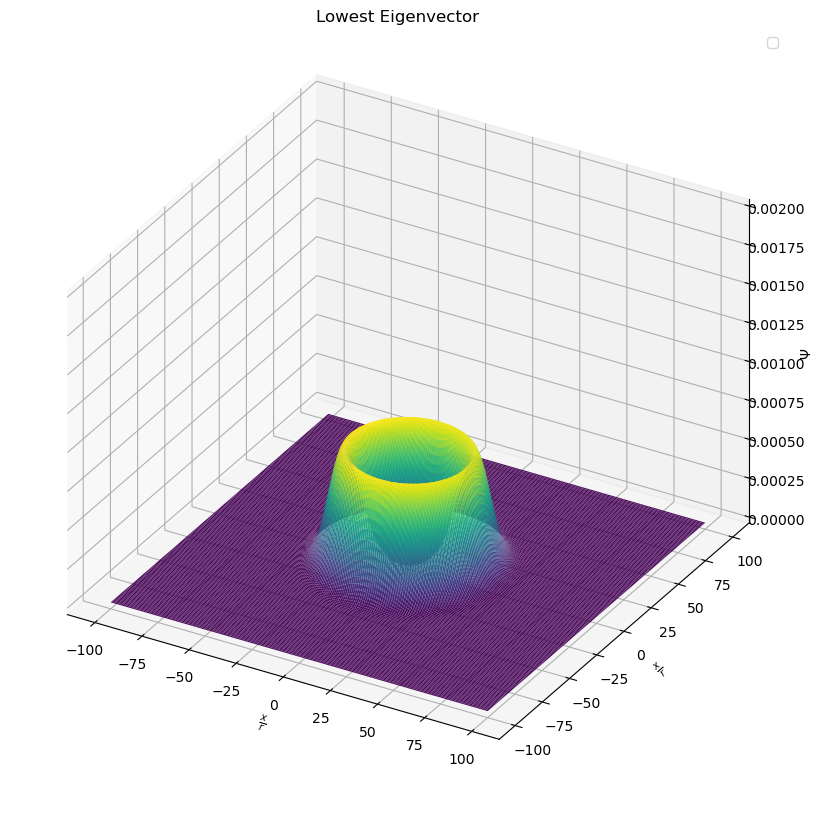

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
x_axis = np.linspace(-N/2,N/2,N)
y_axis = np.linspace(-N/2,N/2,N)
X,Y = np.meshgrid(x_axis,y_axis)
x_expected = (expectation_position(psi)[0][0]-N/2)*epsilon
y_expected = (expectation_position(psi)[1][0]-N/2)*epsilon
x_indetermination = (indetermination_position(psi)[0][0])*epsilon
hf = plt.figure(figsize=(10, 20))
ha = hf.add_subplot(111, projection='3d')
ha.set_proj_type('ortho')
plt.title('Lowest Eigenvector')
plt.xlabel(r"$\frac{x}{r}$")
plt.ylabel(r"$\frac{x}{r}$")
#plt.zlabel(r"$\Psi$")

ha.set_zlabel(r"$\Psi$")
#plt.plot(x_axis,lowest_EigVector, label = fr'Lowest eigenvector for N={N}, $\epsilon$={epsilon_2:.1e}')

ha.plot_surface(X, Y, lowest_EigVector.real, cmap='viridis', rstride=1, cstride=1, alpha=None)
ha.set_zlim(0, 0.002)
# ha.plot([x_expected , x_expected],[ y_expected , y_expected],[0. ,0.001], 'r',alpha=1, linewidth=3)
# ha.plot([x_expected+x_indetermination , x_expected+x_indetermination],[ y_expected , y_expected],[0. ,0.001], 'r',alpha=1, linewidth=3)
plt.legend(loc='upper right')
plt.show()